# Logistic Regression with Python

For this Workbook we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). 


 
## Import Libraries
Let's import some libraries to get started!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

## The Data

In [2]:
train=pd.read_csv("titanic_train.csv")
test=pd.read_csv("titanic_test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


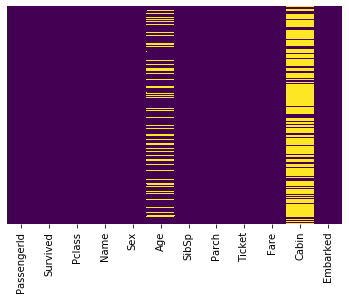

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

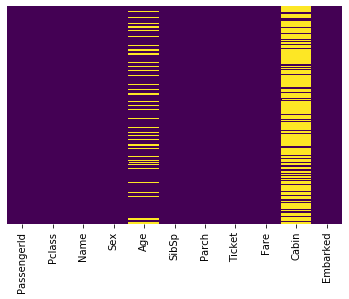

In [8]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

## Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

## Cleaning Train Data

In [9]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We Need to Change below mentioned columns: 
   - Name : Nmae column contains string value! We will convert this string value into numberic by checking Name diffrence such as Mr,Mrs,Miss and Master
   - Sex : Sex column is also having string value! We will use pandas get_dummies(). 
   - Age : We will fill some missing value in Age by taking out average value on based of pclass.
   - Cabin : Due to more missing values we will Drop Table.
   - Embarked : Column is also having  string value! We will use pandas get_dummies().
   - Ticket : We also need to Drop Ticket Column as it wont help.
   

In [10]:
from re import search 
def Name_impute(name):
    name = str(name)
    
    if 'Miss' in name:
        return 1
    elif 'Mrs' in name:
        return 2
    elif 'Mr' in name:
        return 3
    elif 'Master' in name:
        return 4
    else :
        return 5

In [11]:
train['name_value']=train[['Name']].apply(Name_impute,axis=1)

In [12]:
def impute_Age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1 :
            return 37
        elif Pclass == 2:
            return 29
        else :
            return 24
        
    else :
        return Age

In [13]:
train['Age']=train[['Age','Pclass']].apply(impute_Age,axis=1)

In [14]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [15]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [16]:
train.drop(['Name','Sex','Ticket','Embarked','PassengerId','Cabin'],axis=1,inplace=True)

In [17]:
train=pd.concat([train,sex,embark],axis=1)

In [18]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,name_value,male,Q,S
0,0,3,22.0,1,0,7.2500,3,1,0,1
1,1,1,38.0,1,0,71.2833,2,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,2,0,0,1
4,0,3,35.0,0,0,8.0500,3,1,0,1


## Cleaninng Test Data

In [19]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Oops our test data has no value for Survived column. <br>
No Worries We have another csv file present in repository! Lets Merge it  

In [20]:
test_s=pd.read_csv("gender_submission.csv")

In [21]:
test_s.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [22]:
test=pd.merge(left=test,left_index=True,right=test_s,right_index=True,how='inner')

In [23]:
test.head()

,PassengerId_x,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId_y,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,892,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,893,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,894,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,895,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,896,1


- Cool! Now we can clean test data same as we did Train data 

In [24]:
test['name_value']=test[['Name']].apply(Name_impute,axis=1)

In [25]:
test['Age']=test[['Age','Pclass']].apply(impute_Age,axis=1)

In [26]:
sex=pd.get_dummies(test['Sex'],drop_first=True)

In [27]:
embark=pd.get_dummies(test['Embarked'],drop_first=True)

In [28]:
test.drop(['Name','Sex','Ticket','Embarked','PassengerId_x','Cabin','PassengerId_y'],axis=1,inplace=True)

In [29]:
test=pd.concat([test,sex,embark],axis=1)

In [30]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,name_value,male,Q,S
0,3,34.5,0,0,7.8292,0,3,1,1,0
1,3,47.0,1,0,7.0000,1,2,0,0,1
2,2,62.0,0,0,9.6875,0,3,1,1,0
3,3,27.0,0,0,8.6625,0,3,1,0,1
4,3,22.0,1,1,12.2875,1,2,0,0,1


In [31]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,name_value,male,Q,S
0,0,3,22.0,1,0,7.2500,3,1,0,1
1,1,1,38.0,1,0,71.2833,2,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,2,0,0,1
4,0,3,35.0,0,0,8.0500,3,1,0,1


# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [32]:
#train
X_train=train.drop('Survived',axis=1)

y_train=train['Survived']

#test
X_test=test.drop('Survived',axis=1)

y_test=test['Survived']

## Training and Predicting

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel=LogisticRegression()

In [35]:
logmodel.fit(X_train,y_train)

C:\Users\mhmom\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
prediction=logmodel.predict(X_test)

Let's move on to evaluate our model!

## Evaluation 

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       266
           1       0.94      0.95      0.94       152

   micro avg       0.96      0.96      0.96       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.96      0.96      0.96       418



- you can also check your result in confusion matrix.

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
print(confusion_matrix(y_test,prediction))

[[256  10]
 [  8 144]]
